## Лабораторная работа №4

Машина опорных векторов

Машины опорных векторов (support vector machine, SVM) один из крайне популярных алгоритмов машинного обучения. Данное семейство алгоритмов может применяться как для решения задач классификации, так и для задач регрессии. С одной
стороны, он относится к классу линейных моделей. И не смотря на свою простоту
может давать уверенные результаты. С другой стороны, алгоритм допускает решение задач классификации в случае, если выборка не является линейно разделимой.
Данный подход (kernel trick) существенно расширяет возможности алгоритма, позволяя ему быть (даже буквально, геометрически) более гибким, чем другие линейные
модели классификации.

Ход выполнения работы
1. Реализовать генератор входных данных, которые будут использоваться для
обучения алгоритма и анализа качества обучения с помощью метрик после его
обучения. Требования:
* Признаки: (x, y) ∈ [−1, 1] × [−1, 1]. Иными словами, пространство признаков - квадрат в плоскости R2.

* Граница разделения классов: x^2 + y^2 = 1/4. Объекты одного класса лежат
внутри окружности R = 1/2, объекты другого класса лежат вне окружности.

* Входной параметр генератора: размер выборки.
2. Реализовать функции метрик качества: accurace, precision, recall, F-мера. Входные данные: истинные метки классов, предсказанные метки классов. Выходные
данные: значение метрики
3. Обучить ансамбль моделей NuSVC с различными условиями:
(a) Выбор ядра SVM (линейное, полиномиальное, гауссово (rbf), сигмоид). Построить графически классы с разными метками, а также разделяющую
гиперповерхность для каждого из ядер. Объем обучающей выборки произвольный, но одинаковый для сравнения построенной поверхности для
различных ядер. Сравнить метрики качества в зависимости от выбора ядра.
(b) Объем обучающей выборки. Исследовать зависимость метрик качества от
объема обучающей выборки.
(c) Параметр ν - нижняя граница доли опорных векторов. Сравнить графически и на основе метрик качества.
В пунктах (b) и (c) ядро допускается выбрать фиксированным, например rbf.

### Импортируем необходимые библиотеки

In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

### Задание №1

In [ ]:
def create_random_sample(n: int) -> pd.DataFrame:
    parameters = np.random.uniform(-1, 1, (n, 2))
    target = np.array([x ** 2 + y ** 2 > 0.25 for x, y in parameters])
    return pd.DataFrame(np.hstack((parameters, target.reshape(-1, 1))), columns=["x", "y", "target"])

In [ ]:
create_random_sample(15)

,x,y,target
0,-0.634444,0.700579,1.0
1,-0.662954,-0.157931,1.0
2,-0.522615,0.054999,1.0
3,-0.664835,0.876984,1.0
4,-0.269503,0.602713,1.0
5,0.623107,0.647226,1.0
6,-0.635539,0.123318,1.0
7,-0.347152,-0.729817,1.0
8,0.450697,-0.726692,1.0
9,0.264143,-0.117591,0.0


### Задание №2

In [ ]:
def accuracy_score(y_true: np.array, y_pred: np.ndarray) -> float:
    return (y_true == y_pred).mean()


def recall_score(y_true: np.array, y_pred: np.ndarray) -> float:
    return (y_true * y_pred).sum() / y_true.sum()


def precision_score(y_true: np.array, y_pred: np.ndarray) -> float:
    return (y_true * y_pred).sum() / y_pred.sum()


def f1_score(y_true: np.array, y_pred: np.ndarray) -> float:
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2 * precision * recall / (precision + recall)

### Задание №3 (а)

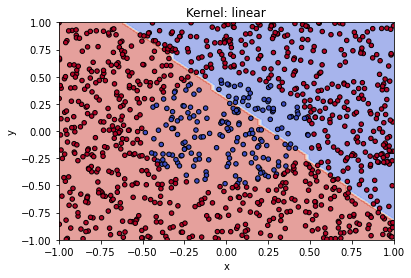

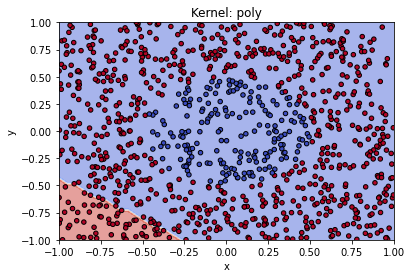

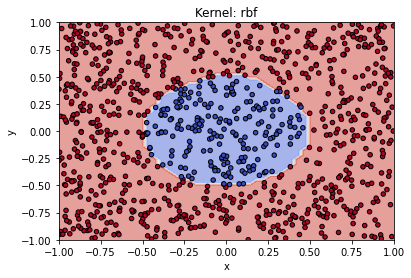

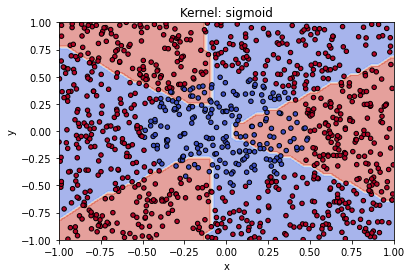

In [ ]:
SAMPLE_SIZE = 5_000
kernels = ["linear", "poly", "rbf", "sigmoid"]

metrics_data_kernel = {}
for index, kernel in enumerate(kernels):
    model = NuSVC(nu=0.1, kernel=kernel, gamma=10)
    sample = create_random_sample(SAMPLE_SIZE)
    x_train, x_test, y_train, y_test = train_test_split(sample[["x", "y"]], sample.target, test_size=0.2)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics_data_kernel[kernel] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

    display = DecisionBoundaryDisplay.from_estimator(
        model, x_test, response_method="predict", cmap=plt.cm.coolwarm,
        alpha=0.5, xlabel="x", ylabel="y")
    plt.scatter(x_test.x, x_test.y, c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.title(f"Kernel: {kernel}")
    plt.show()

In [ ]:
metrics_data_kernel_df = pd.DataFrame(metrics_data_kernel).T
metrics_data_kernel_df

,accuracy,recall,precision,f1
linear,0.525,0.591133,0.770465,0.668990
poly,0.252,0.070807,1.000000,0.132251
rbf,0.994,0.997478,0.994969,0.996222
sigmoid,0.504,0.450758,0.854067,0.590083


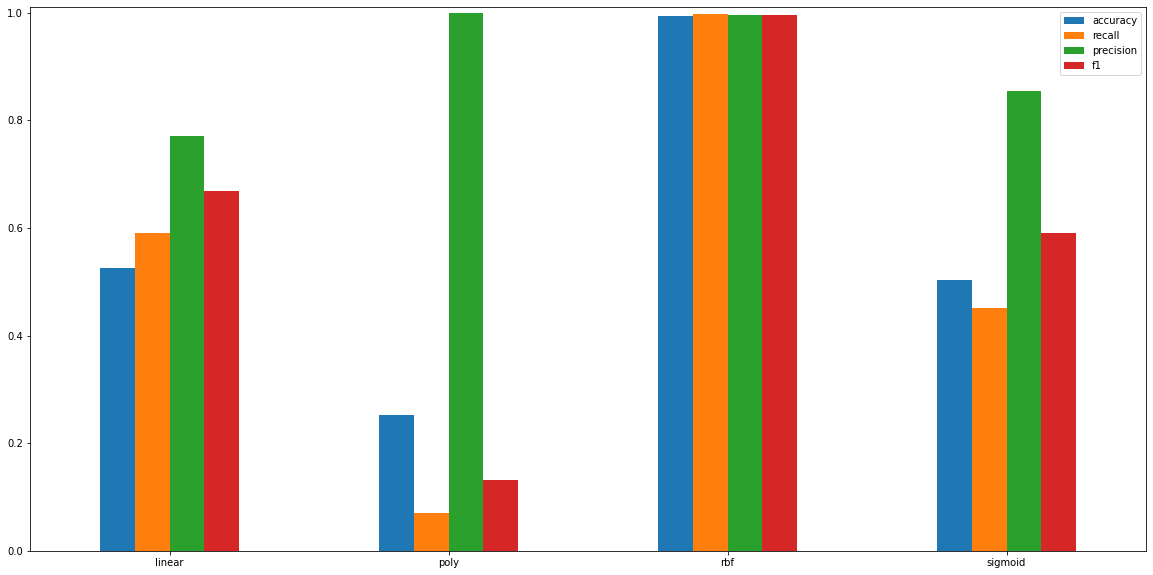

In [ ]:
metrics_data_kernel_df.plot.bar(rot=0, figsize=(20, 10), ylim=(0, 1.01))
plt.show()

### Результаты №3 (а)

В данном задании данные, предоставленные метриками качества довольно очевидны из графиков. Модели с ядрами Linear, Polynomial, Sigmoid довольно посредственно справились с задачей классификации. Особенно можно выделить poly, accuracy_score и f1_score которой равны соотвественно 0,25 и 0,1, что является неудовлетворительным результатом. Связано это с тем, что функции ядра этих моделей не подходят для классификации в нашей ситуации (классы разделяет окружность). Лучшие и почти идеальные результаты показывает ядро Radial Basis Function, которое является стандартным для SVM в scikit-learn.

### Задание №3 (b)

In [ ]:
%%time
sample_sizes = [100, 1000, 5_000, 10_000, 50_000, 100_000]

metrics_data_sample_size = {}
for index, sample_size in enumerate(sample_sizes):
    model = NuSVC(nu=0.1, kernel="rbf", gamma=10)
    sample = create_random_sample(sample_size)
    x_train, x_test, y_train, y_test = train_test_split(sample[["x", "y"]], sample.target, test_size=0.2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics_data_sample_size[sample_size] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

    stage = index + 1
    progress = "▰" * stage + "▱" * (len(sample_sizes) - stage)
    print("Size: {: >6}, progress: {: >6}".format(sample_size, progress))

Size:    100, progress: ▰▱▱▱▱▱
Size:   1000, progress: ▰▰▱▱▱▱
Size:   5000, progress: ▰▰▰▱▱▱
Size:  10000, progress: ▰▰▰▰▱▱
Size:  50000, progress: ▰▰▰▰▰▱
Size: 100000, progress: ▰▰▰▰▰▰
CPU times: user 1min 55s, sys: 1.05 s, total: 1min 57s
Wall time: 1min 56s


In [ ]:
metrics_data_kernel_df = pd.DataFrame(metrics_data_sample_size).T
metrics_data_kernel_df

,accuracy,recall,precision,f1
100,1.0000,1.000000,1.000000,1.000000
1000,0.9850,1.000000,0.981928,0.990881
5000,0.9910,0.998747,0.990062,0.994386
10000,0.9960,1.000000,0.995046,0.997517
50000,0.9959,1.000000,0.994936,0.997461
100000,0.9961,1.000000,0.995183,0.997586


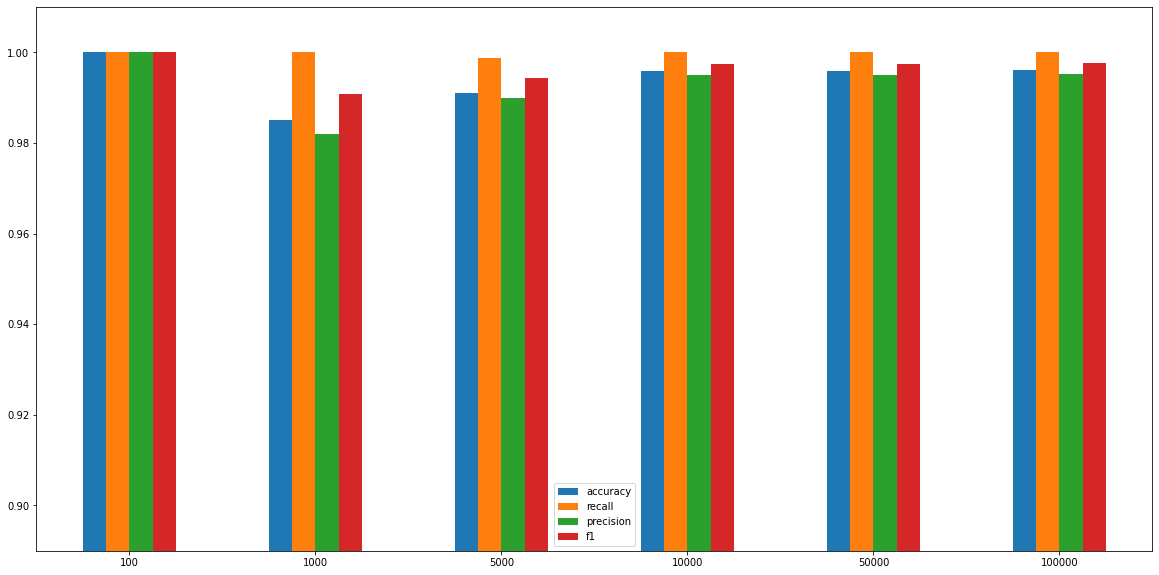

In [ ]:
metrics_data_kernel_df.plot.bar(rot=0, figsize=(20, 10), ylim=(0.89, 1.01))
plt.show()

### Результаты №3 (b)

Из графиков, полученных нами в этом задании можно увидеть, что метрики качества улучшаются с увеличением объёма выборки. Случай с n = 100 - случайность, ведь мы предсказываем значение всего лишь 20 объектов, что не показательно. Наиболее релевантно в ключе сравнения одной и той же модели с различными гиперпараметрами обращать внимание на precision и f1, если не было дано никаких установок по условию. Время исполнения для n = 500_000 измеряется в десятках минут, поэтому продолжать исследование нерационально. Наилучший результат из показательных принадлежит модели с n = 100_000.

### Задание №3 (с)

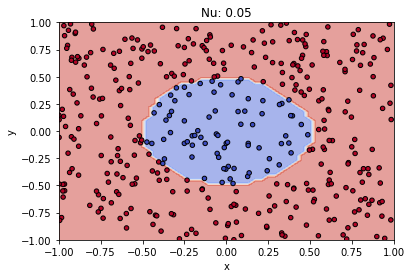

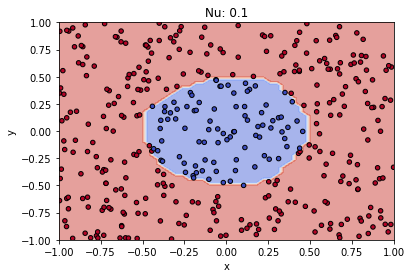

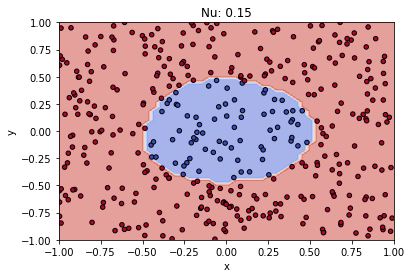

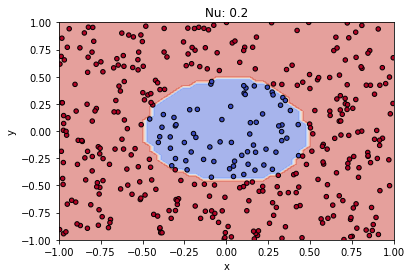

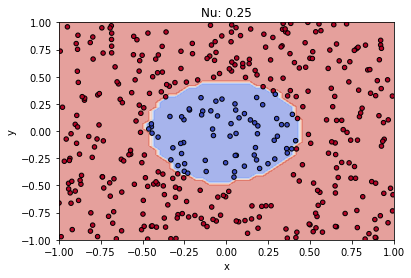

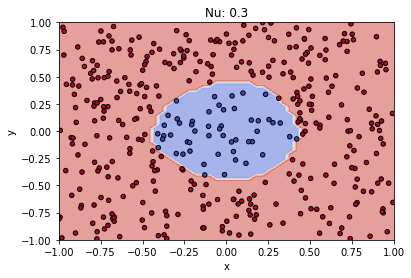

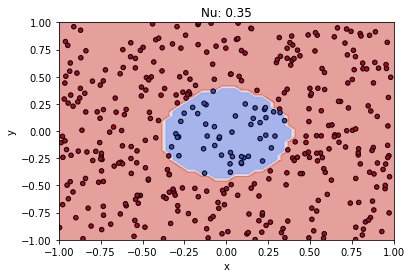

CPU times: user 3.46 s, sys: 53.7 ms, total: 3.52 s
Wall time: 3.53 s


In [ ]:
%%time
lower_bounds_sv = np.arange(0.05, 0.36, 0.05)

metrics_data_nu = {}
for lower_bound in lower_bounds_sv:
    lower_bound = round(lower_bound, 2)
    model = NuSVC(nu=lower_bound, kernel="rbf", gamma=10)
    sample = create_random_sample(SAMPLE_SIZE)
    x_train, x_test, y_train, y_test = train_test_split(sample[["x", "y"]], sample.target, test_size=0.2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    metrics_data_nu[lower_bound] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred)
    }

    display = DecisionBoundaryDisplay.from_estimator(
        model, x_test, response_method="predict", cmap=plt.cm.coolwarm,
        alpha=0.5, xlabel="x", ylabel="y")
    plt.scatter(x_test.x, x_test.y, c=y_pred, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.title(f"Nu: {lower_bound}")
    plt.show()

In [ ]:
metrics_data_nu_df = pd.DataFrame(metrics_data_nu).T
metrics_data_nu_df

,accuracy,recall,precision,f1
0.05,0.9975,1.000000,0.996914,0.998454
0.10,0.9875,0.996753,0.987138,0.991922
0.15,0.9875,0.996923,0.987805,0.992343
0.20,0.9925,1.000000,0.990964,0.995461
0.25,0.9775,1.000000,0.973054,0.986343
0.30,0.9550,1.000000,0.948424,0.973529
0.35,0.9250,1.000000,0.914773,0.955490


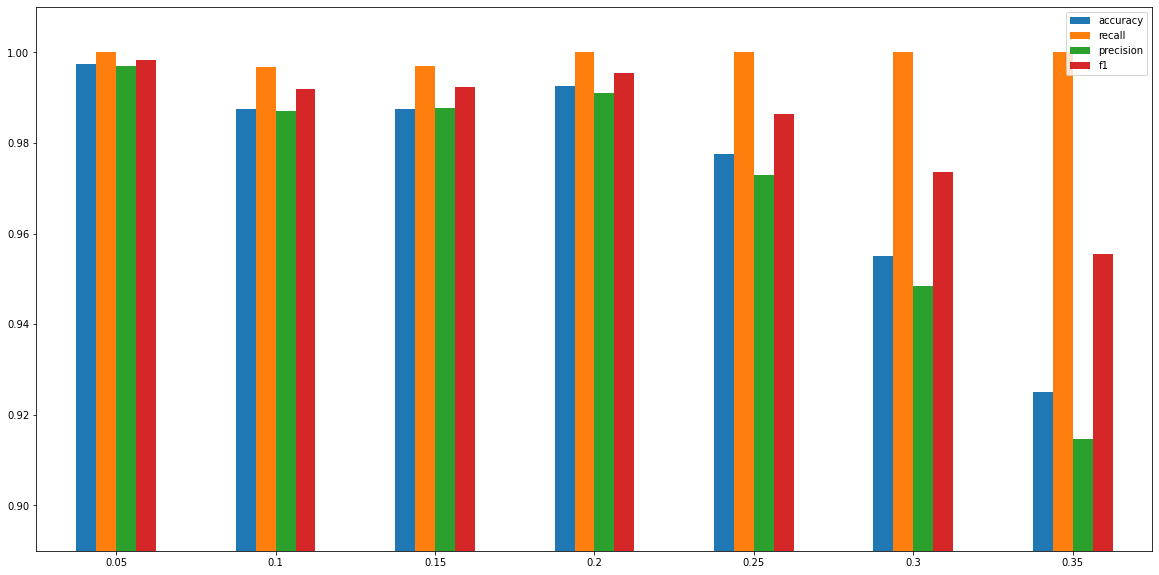

In [ ]:
metrics_data_nu_df.plot.bar(rot=0, figsize=(20, 10), ylim=(0.89, 1.01))
plt.show()

### Результаты №3 (с)

Из последнего графика можно увидеть, что при увеличении нижней границы доли опорных векторов, точность модели уменьшается (как описано в прошлом пункте, наиболее показательными в данном сравнении являются precision и f1). На графиках с распределением объектов и разделающими гиперповерхностями изменение можно заметить в виде сужения эллипсообразной области, в которой располагаются объекты класса 1. Наилучшие результаты показала модель с ν = 0,05.